### Exploratory Analysis ###

In [44]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv("hot-100-current.csv")
data.head()

,chart_week,current_week,title,performer,last_week,peak_pos,wks_on_chart
0,2022-01-01,1,All I Want For Christmas Is You,Mariah Carey,1.0,1,50
1,2022-01-01,2,Rockin' Around The Christmas Tree,Brenda Lee,2.0,2,44
2,2022-01-01,3,Jingle Bell Rock,Bobby Helms,4.0,3,41
3,2022-01-01,4,A Holly Jolly Christmas,Burl Ives,5.0,4,25
4,2022-01-01,5,Easy On Me,Adele,3.0,1,11


In [ ]:
data["chart_week"] = pd.to_datetime(data["chart_week"])
pivot = data.pivot_table(
    index=['title', 'performer'],
    columns='chart_week',
    values='current_week'
)

,chart_week,1958-08-04,1958-08-11,1958-08-18,1958-08-25,1958-09-01,1958-09-08,1958-09-15,1958-09-22,1958-09-29,1958-10-06,...,2024-04-06,2024-04-13,2024-04-20,2024-04-27,2024-05-04,2024-05-11,2024-05-18,2024-05-25,2024-06-01,2024-06-08
title,performer,,,,,,,,,,,,,,,,,,,,,
"""B"" Girls",Young And Restless,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Cherry Cherry"" from Hot August Night",Neil Diamond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Having A Party"" Medley",The Ovations (Featuring Louis Williams),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Joy"" Pt. I",Isaac Hayes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""Roots"" Medley",Quincy Jones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
transparentsoul,Willow Featuring Travis Barker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
whoa (mind in awe),XXXTENTACION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
whoknows,Musiq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
bob = pivot[
    pivot.index.get_level_values("performer").str.contains("bob dylan", case=False)
]

aligned = {}

for (title, performer), row in bob.iterrows():

    # Drop weeks where the song wasn't on the chart
    track = row.dropna().sort_index()
    
    # Re-number from 1 to N
    track.index = range(1, len(track) + 1)
    
    aligned[(title, performer)] = track

aligned_df = pd.DataFrame(aligned)

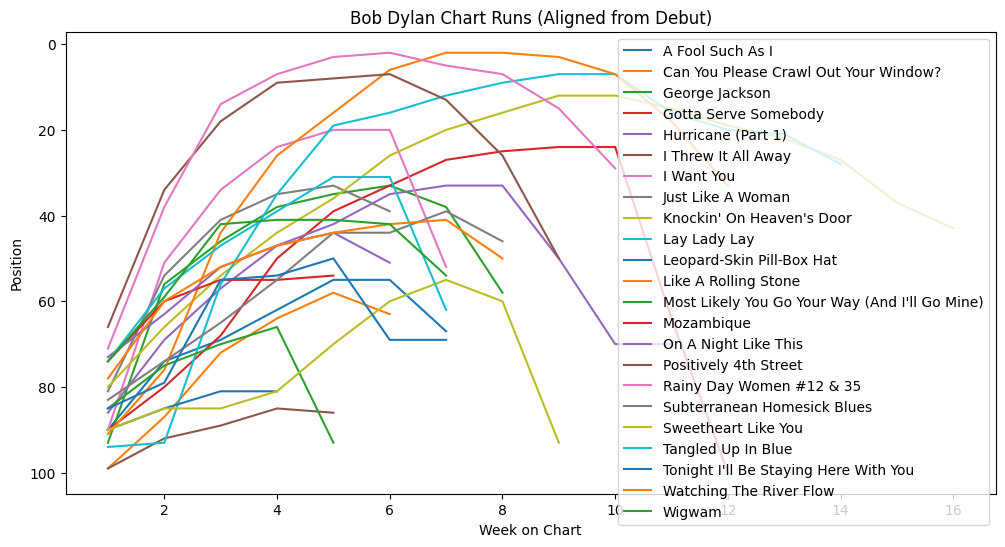

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for col in aligned_df:
    plt.plot(aligned_df.index, aligned_df[col], label=col[0])  # just title

plt.gca().invert_yaxis()
plt.title("Bob Dylan Chart Runs (Aligned from Debut)")
plt.xlabel("Week on Chart")
plt.ylabel("Position")
plt.legend()
plt.show()